In [1]:
import pandas as pd
csv_path = "datasets/titanic/titanic"
# Load the CSV file into a pandas DataFrame
gender_submission = pd.read_csv("gender_submission.csv")

# Display the first few rows
print(gender_submission.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [2]:
train_csv = pd.read_csv("train.csv")
train_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#steps to this
#find any missing values and fix that in the data

In [4]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_csv['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
train_csv['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F2             3
C22 C26        3
              ..
C106           1
A19            1
D7             1
C118           1
E50            1
Name: Cabin, Length: 147, dtype: int64

In [7]:
train_csv['Ticket'].value_counts()

1601         7
CA. 2343     7
347082       7
3101295      6
CA 2144      6
            ..
A/5 21172    1
349219       1
234818       1
345364       1
A/5 2466     1
Name: Ticket, Length: 681, dtype: int64

In [8]:
train_csv['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [9]:
train_csv.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


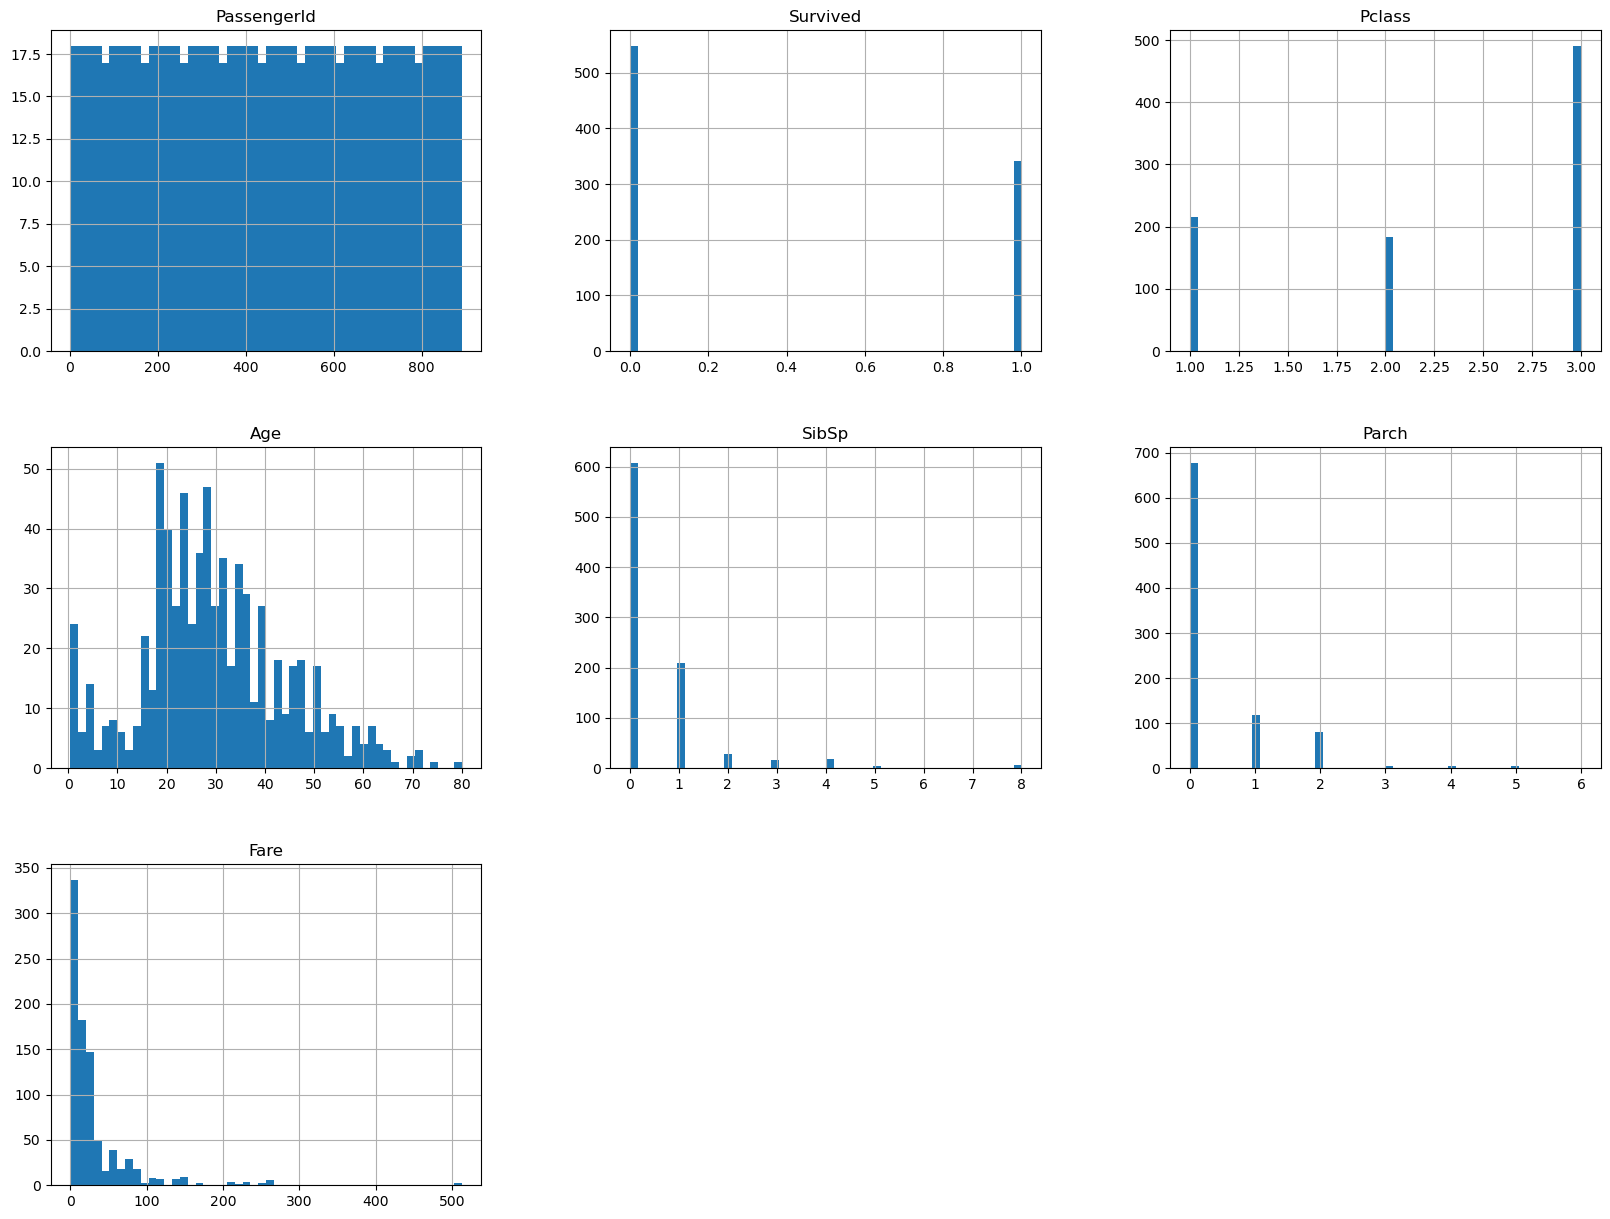

In [10]:
import matplotlib.pyplot as plt 
train_csv.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: xlabel='Fare', ylabel='Age'>

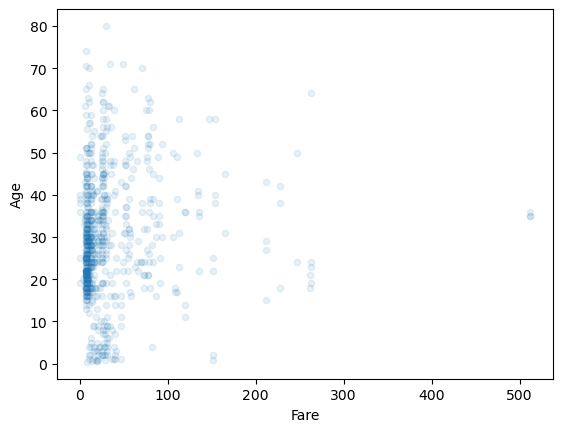

In [11]:
train_csv.plot(kind="scatter", x="Fare", y="Age", alpha=0.1)

In [12]:
corr_matrix = train_csv.select_dtypes(include=['float64', 'int64']).corr()

In [13]:
corr_matrix['Pclass']

PassengerId   -0.035144
Survived      -0.338481
Pclass         1.000000
Age           -0.369226
SibSp          0.083081
Parch          0.018443
Fare          -0.549500
Name: Pclass, dtype: float64

In [14]:
train_csv_labels = train_csv["Survived"].copy()
train_csv_all = train_csv.copy()
train_csv.drop(["Survived"], axis=1, inplace=True)

In [15]:
corr_matrix['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_csv_cat = train_csv['Sex']
train_csv_cat_encoded = encoder.fit_transform(train_csv_cat) 
train_csv_cat_encoded

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [17]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
train_csv_cat_1hot = encoder.fit_transform(train_csv_cat_encoded.reshape(-1,1))
train_csv_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 891 stored elements and shape (891, 2)>

In [18]:
train_csv_cat_1hot.toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [19]:
train_csv_num = train_csv.drop(["Sex", "Name", "Ticket", "Cabin", "Embarked"], axis=1)
train_csv_cat = train_csv.drop(["PassengerId", "Pclass", "Age", "SibSp", "Parch", "Fare"],axis=1)

In [20]:
train_csv_num

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000
887,888,1,19.0,0,0,30.0000
888,889,3,NaN,1,2,23.4500
889,890,1,26.0,0,0,30.0000


In [21]:
train_csv_cat

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [22]:
#train_csv_cat_attrib = ["Name", "Sex", "Ticket", "Cabin", "Embarked"]
#train_csv_cat_attrib = ["Sex", "Ticket", "Cabin", "Embarked"]
train_csv_cat_attrib = ["Sex"]
#train_csv_num_attrib = ["PassengerId", "Pclass", "Age", "SibSp", "Parch", "Fare"]
train_csv_num_attrib = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
#train_csv_num_attrib = ["Pclass", "Fare"]
#train_csv_num_attrib = ["Pclass", "Age", "Fare"]

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

#returns the values under the specified columns
class DataFrameSelector(BaseEstimator, TransformerMixin): 
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names 
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self # nothing else to do 
    def transform(self, X, y=None):
        X = X.copy()  # Avoid modifying the original dataframe
        family_size = X[:, 2] + X[:, 3]
        X = np.delete(X, [2, 3], axis=1)
        return np.c_[X, family_size]

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion 
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(train_csv_num_attrib)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(train_csv_cat_attrib)),
    ('one_hot_encoder', OneHotEncoder()),
])
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [25]:
#data after its gone through the data preperation pipeline
train_csv_prepared = full_pipeline.fit_transform(train_csv)
train_csv_prepared.dtype
train_csv_prepared

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4455 stored elements and shape (891, 6)>

In [26]:
cat_pipeline = full_pipeline.transformer_list[1][1]  # Index 1 corresponds to "cat_pipeline"
ohe = cat_pipeline.named_steps['one_hot_encoder']

categories = ohe.categories_
print("Categories for each feature:", categories)

# Get the number of categories for each feature
num_categories = [len(cat) for cat in categories]
print("Number of categories for each feature:", num_categories)

#print out all of the new features created by the one hot encoder
cat_feature_names = ohe.get_feature_names_out(train_csv_cat_attrib)
print("cat_feature_names")
print(cat_feature_names)

Categories for each feature: [array(['female', 'male'], dtype=object)]
Number of categories for each feature: [2]
cat_feature_names
['Sex_female' 'Sex_male']


In [27]:
train_csv_labels

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

knn_clf = KNeighborsClassifier()
knn_clf.fit(train_csv_prepared, train_csv_labels)

KNeighborsClassifier()

In [29]:
from sklearn.model_selection import cross_val_predict, cross_val_score

y_train_pred = cross_val_score(knn_clf, train_csv_prepared, train_csv_labels, cv=3)
y_train_pred
#78 - 80% accuracy

array([0.78787879, 0.82154882, 0.81818182])

In [30]:
# now that we have a basic model working, we need to evaluate it
# lets look at the best feature predictors first
correlation_matrix = train_csv_all.corr()

# Check correlation with target ('Survived' in your case)
print(correlation_matrix['Survived'])

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64


/tmp/ipykernel_13478/3190115125.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_csv_all.corr()


In [31]:
#train_csv_prepared.get_feature_names_out()
train_csv_all
#train_csv_all['Cabin'].value_counts()
train_csv_all['Ticket'].value_counts()

1601         7
CA. 2343     7
347082       7
3101295      6
CA 2144      6
            ..
A/5 21172    1
349219       1
234818       1
345364       1
A/5 2466     1
Name: Ticket, Length: 681, dtype: int64

In [32]:
from sklearn.inspection import permutation_importance

num_feature_names = train_csv_num_attrib
feature_names = list(num_feature_names) + list(cat_feature_names)
feature_names.append("family_size")
feature_names.remove("SibSp")
feature_names.remove("Parch")
feature_names.remove("Sex_female")
feature_names.remove("Sex_male")
feature_names.append("Sex_female")
feature_names.append("Sex_male")

train_csv_prepared_dense = train_csv_prepared.toarray()

result = permutation_importance(knn_clf, train_csv_prepared_dense, train_csv_labels, n_repeats=10, random_state=42, n_jobs=-1)

# Extract feature importance and create a DataFrame
importance = result.importances_mean
feature_importance = pd.DataFrame(importance, index=feature_names, columns=["Importance"]).sort_values(by="Importance", ascending=False)

print(feature_importance)

             Importance
Pclass         0.098878
Age            0.096184
Fare           0.076655
family_size    0.068911
Sex_male       0.046914
Sex_female     0.046240


In [33]:
#feature importance output
#Pclass        0.084961
#Age           0.069697
#Fare          0.069024
#SibSp         0.053086
#Parch         0.039843
#Sex_female    0.030415
#Sex_male      0.030415

In [34]:
train_csv_all['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [35]:
# Survived output
# 0    549
# 1    342
# moderately skewed to one class, show oversample minority class since the dataset is overall small
# could also add more 'weight' to the minority class
# could instead use f score instead of accuracy

In [36]:
#KNN classifier
y_train_pred = cross_val_score(knn_clf, train_csv_prepared, train_csv_labels, cv=3)
y_train_pred
#78 - 80% accuracy

array([0.78787879, 0.82154882, 0.81818182])

In [37]:
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_csv_prepared, train_csv_labels)

SGDClassifier(random_state=42)

In [38]:
y_train_pred = cross_val_score(sgd_clf, train_csv_prepared, train_csv_labels, cv=3)
y_train_pred
#68 - 78% accuracy

array([0.78451178, 0.74747475, 0.78787879])

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_csv_prepared, train_csv_labels)

RandomForestClassifier(random_state=42)

In [40]:
y_train_pred = cross_val_score(rf_classifier, train_csv_prepared, train_csv_labels, cv=3)
y_train_pred
#77 - 84% accuracy

array([0.78787879, 0.84511785, 0.82491582])

In [41]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(train_csv_prepared, train_csv_labels)

DecisionTreeClassifier(random_state=42)

In [42]:
y_train_pred = cross_val_score(dt_classifier, train_csv_prepared, train_csv_labels, cv=3)
y_train_pred
#74 - 78% accuracy

array([0.74747475, 0.77777778, 0.77104377])

In [43]:
# Random forest and KNN are the best performers
# Check there f score since its a skewed data set

In [44]:
from sklearn.metrics import f1_score

y_pred = knn_clf.predict(train_csv_prepared)
f1_score(train_csv_labels, y_pred)
# f score for knn is 0.8131539611360239

0.8242424242424242

In [45]:
y_pred = rf_classifier.predict(train_csv_prepared)
f1_score(train_csv_labels, y_pred)
# f score for random forest is 0.9732142857142857

0.973293768545994

In [46]:
current_params = rf_classifier.get_params()
print(current_params)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [47]:
#with the random forest, find the best parameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(train_csv_prepared, train_csv_labels)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")
# Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
# Best Cross-Validation Score: 0.8350

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Score: 0.8429


In [48]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider for split
    'bootstrap': [True, False],  # Whether to use bootstrap samples
    'criterion': ['gini', 'entropy'],  # The function to measure the quality of a split
    'oob_score': [True, False],  # Whether to use out-of-bag samples to estimate the generalization error
    'random_state': [42],  # Seed for reproducibility (fixed for consistency)
}

random_search = RandomizedSearchCV(
    estimator=rf_classifier, 
    param_distributions=param_grid,
    n_iter=100, 
    cv=5, 
    n_jobs=-1, 
    random_state=42
)

random_search.fit(train_csv_prepared, train_csv_labels)
print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"Best Cross-Validation Score: {random_search.best_score_:.4f}")
# Best Hyperparameters: {'random_state': 42, 
# 'oob_score': False, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 
# 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': False}
# Best Cross-Validation Score: 0.8407

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
250 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
115 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/ensemble/_f

Best Hyperparameters: {'random_state': 42, 'oob_score': False, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'gini', 'bootstrap': True}
Best Cross-Validation Score: 0.8429


In [49]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Different values of K
    'weights': ['uniform', 'distance'],  # Weighting functions
    'metric': ['minkowski', 'euclidean', 'manhattan'],  # Distance metrics
    'leaf_size': [10, 20, 30, 40],  # Leaf size for the tree
    'p': [1, 2]  # Distance parameter (1 for Manhattan, 2 for Euclidean)
}

grid_search = GridSearchCV(estimator=knn_clf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(train_csv_prepared, train_csv_labels)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")
# Best Hyperparameters: {'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
# Best Cross-Validation Score: 0.8182
# random forest is best

Best Hyperparameters: {'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best Cross-Validation Score: 0.8182


In [50]:
# we got random forest as the best algorithm
# we ran grid search to find the best params
# now we need to look over at the data again to do some cleaning/feature engineering

final_model = random_search.best_estimator_

In [51]:
missing_data = train_csv_all.isnull()

missing_count = train_csv_all.isnull().sum()
print(missing_count)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [52]:
train_csv_prepared

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4455 stored elements and shape (891, 6)>

In [53]:
import numpy as np

dense_matrix = train_csv_prepared.toarray()

# Check for missing values (NaN) in the dense matrix
missing_values = np.isnan(dense_matrix)

# Count the number of missing values in each column
missing_count = missing_values.sum(axis=0)

print(f"Missing values per column: {missing_count}")

Missing values per column: [0 0 0 0 0 0]


In [54]:
df = pd.DataFrame(dense_matrix, columns=feature_names)
df
# none of the data is missing and its all scaled

,Pclass,Age,Fare,family_size,Sex_female,Sex_male
0,0.827377,-0.565736,-0.502445,0.059160,0.0,1.0
1,-1.566107,0.663861,0.786845,0.059160,1.0,0.0
2,0.827377,-0.258337,-0.488854,-0.560975,1.0,0.0
3,-1.566107,0.433312,0.420730,0.059160,1.0,0.0
4,0.827377,0.433312,-0.486337,-0.560975,0.0,1.0
...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.386671,-0.560975,0.0,1.0
887,-1.566107,-0.796286,-0.044381,-0.560975,1.0,0.0
888,0.827377,-0.104637,-0.176263,1.299429,1.0,0.0
889,-1.566107,-0.258337,-0.044381,-0.560975,0.0,1.0


In [55]:
print(df.isnull().sum())

Pclass         0
Age            0
Fare           0
family_size    0
Sex_female     0
Sex_male       0
dtype: int64


In [56]:
print(df.describe())

             Pclass           Age          Fare   family_size  Sex_female  \
count  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02  891.000000   
mean  -8.772133e-17  2.272780e-16  3.987333e-18 -3.987333e-18    0.352413   
std    1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00    0.477990   
min   -1.566107e+00 -2.224156e+00 -6.484217e-01 -5.609748e-01    0.000000   
25%   -3.693648e-01 -5.657365e-01 -4.891482e-01 -5.609748e-01    0.000000   
50%    8.273772e-01 -1.046374e-01 -3.573909e-01 -5.609748e-01    0.000000   
75%    8.273772e-01  4.333115e-01 -2.424635e-02  5.915988e-02    1.000000   
max    8.273772e-01  3.891554e+00  9.667167e+00  5.640372e+00    1.000000   

         Sex_male  
count  891.000000  
mean     0.647587  
std      0.477990  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000  


In [57]:
y_train_pred = cross_val_score(final_model, train_csv_prepared, train_csv_labels, cv=3)
y_train_pred
# forest still performs the same even with optimised parameters

array([0.7979798 , 0.86868687, 0.82828283])

In [58]:
train_csv_prepared = full_pipeline.fit_transform(train_csv)
dense_matrix = train_csv_prepared.toarray()
df = pd.DataFrame(dense_matrix, columns=feature_names)

In [59]:
num_prepared = num_pipeline.fit_transform(train_csv)

In [60]:
#dense_matrix = num_prepared.toarray()
new_num_attribs = [col for col in train_csv_num_attrib if col not in ["SibSp", "Parch"]]
new_num_attribs.append("family_size")
df = pd.DataFrame(num_prepared, columns=new_num_attribs)
df
#confirms the feature extraction of SibSP and Parch worked

,Pclass,Age,Fare,family_size
0,0.827377,-0.565736,-0.502445,0.059160
1,-1.566107,0.663861,0.786845,0.059160
2,0.827377,-0.258337,-0.488854,-0.560975
3,-1.566107,0.433312,0.420730,0.059160
4,0.827377,0.433312,-0.486337,-0.560975
...,...,...,...,...
886,-0.369365,-0.181487,-0.386671,-0.560975
887,-1.566107,-0.796286,-0.044381,-0.560975
888,0.827377,-0.104637,-0.176263,1.299429
889,-1.566107,-0.258337,-0.044381,-0.560975


In [61]:
print(len(final_model.feature_importances_))
print(len(feature_names))

6
6


In [62]:
feature_importances = final_model.feature_importances_

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

       Feature  Importance
2         Fare    0.229019
4   Sex_female    0.215080
1          Age    0.205267
5     Sex_male    0.168105
0       Pclass    0.106877
3  family_size    0.075652


In [63]:
print(feature_names)

['Pclass', 'Age', 'Fare', 'family_size', 'Sex_female', 'Sex_male']


In [64]:
# lets test the final_model on the test set
test_csv = pd.read_csv("test.csv")
test_csv
#gender_submission
gender_submission_new = gender_submission.drop("PassengerId", inplace=False, axis=1)
#print(gender_submission.columns)

In [65]:
test_csv_prepared = full_pipeline.fit_transform(test_csv)
cross_val_scores = cross_val_score(final_model, train_csv_prepared, train_csv_labels, cv=20)
average_accuracy = np.mean(cross_val_scores)
average_accuracy

0.8462878787878788

In [66]:
num_feature_names = train_csv_num_attrib
feature_names = list(num_feature_names) + list(cat_feature_names)

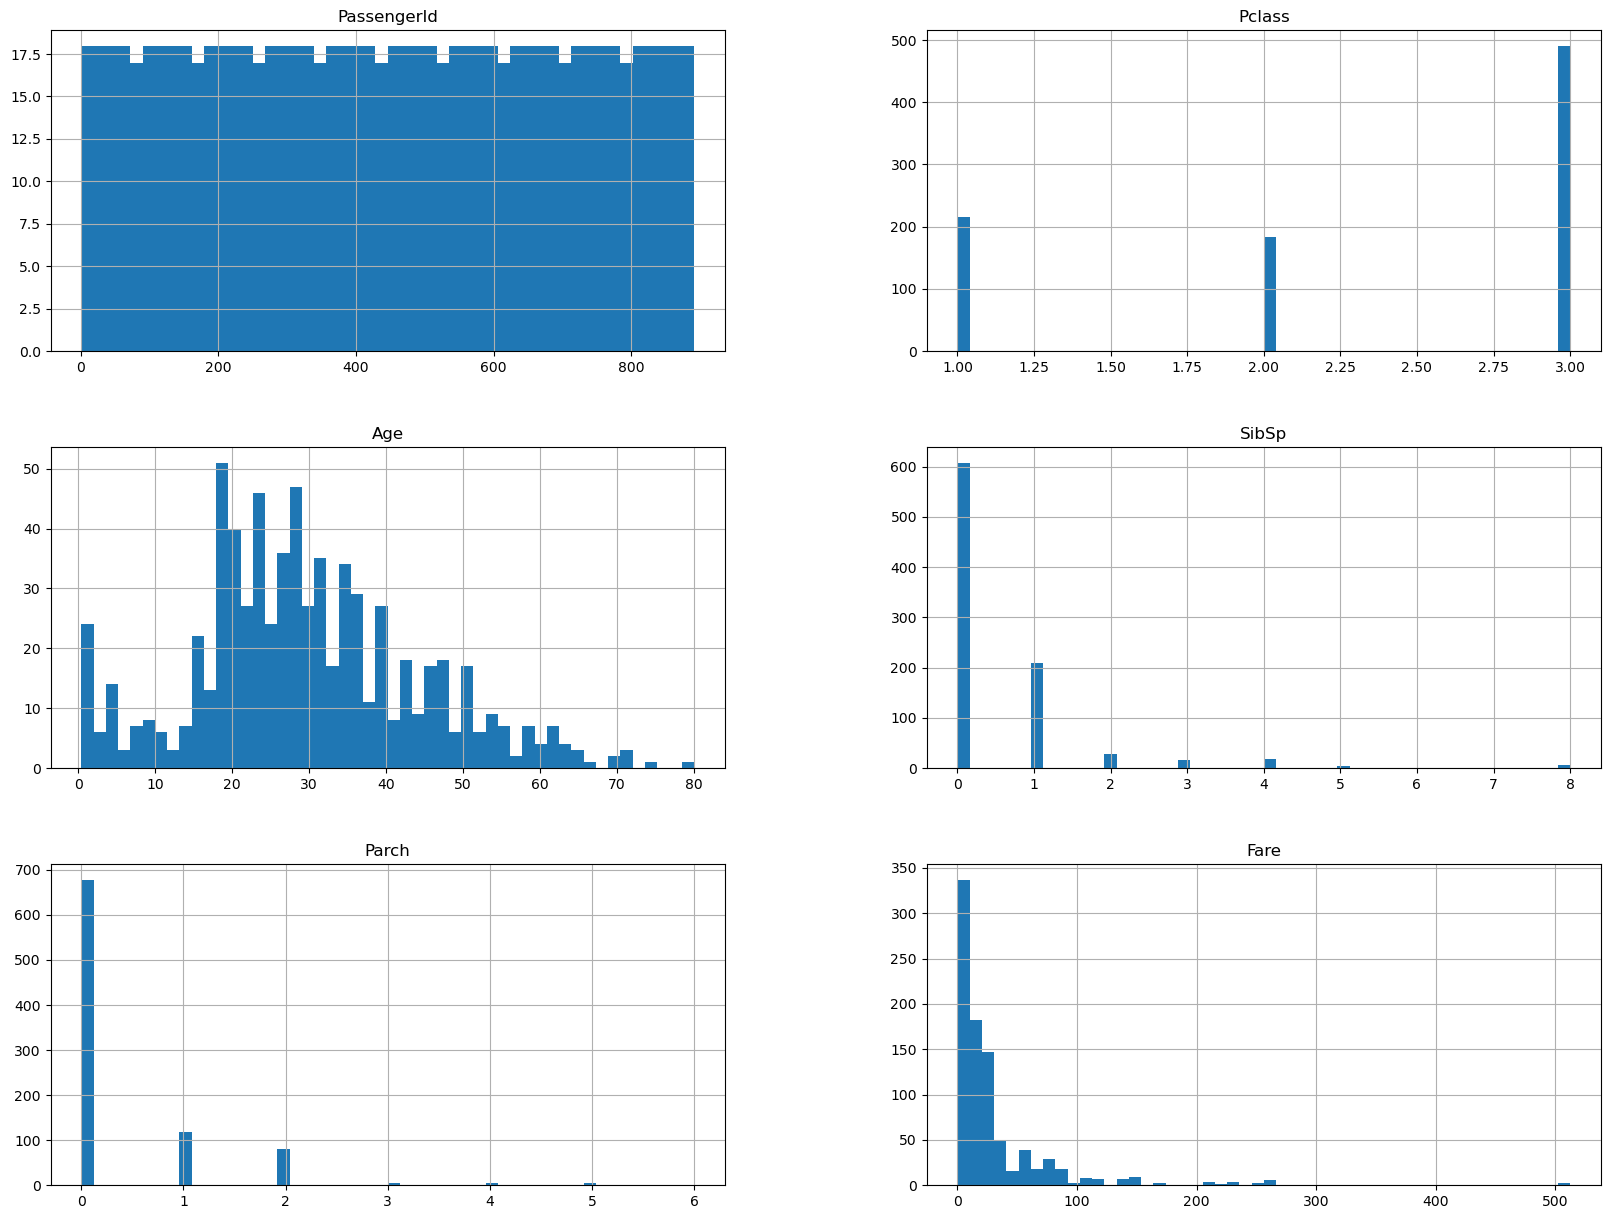

In [67]:
#check for outliers
train_csv.hist(bins=50, figsize=(20,15))
plt.show()

In [68]:
# try binning fare and age to minismise outliers
age_bins = [0, 12, 19, 59, np.inf]  # Bins: 0-12, 13-19, 20-59, 60+
age_labels = ['Child', 'Teenager', 'Adult', 'Senior']
train_csv['AgeGroup'] = pd.cut(train_csv['Age'], bins=age_bins, labels=age_labels)

#use percentiles to create accurate bins, get data from train_csv.describe()
bin_edges = [0, 7.91, 14.45, 31.00, 512.33]
bin_labels = ['Low', 'Medium', 'High', 'Very High']
train_csv['Fare_Binned'] = pd.cut(train_csv['Fare'], bins=bin_edges, labels=bin_labels)

train_csv

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Fare_Binned
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,Low
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Very High
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,Medium
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Very High
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Adult,Medium
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Teenager,High
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,High
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Adult,High


In [69]:
#train_csv_cat_attrib = ["Name", "Sex", "Ticket", "Cabin", "Embarked"]
#train_csv_cat_attrib = ["Sex", "Ticket", "Cabin", "Embarked"]
train_csv_cat_attrib = ["Sex"]
#train_csv_num_attrib = ["PassengerId", "Pclass", "Age", "SibSp", "Parch", "Fare"]
train_csv_num_attrib = ["Pclass", "SibSp", "Parch"]
train_csv_bin_attrib = ["Age", "Fare"]
#train_csv_num_attrib = ["Pclass", "SibSp", "Parch"]
#train_csv_num_attrib = ["Pclass", "Fare"]
#train_csv_num_attrib = ["Pclass", "Age", "Fare"]

In [70]:
#returns the values under the specified columns
class DataFrameSelector(BaseEstimator, TransformerMixin): 
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names 
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self # nothing else to do 
    def transform(self, X, y=None):
        X = X.copy()  # Avoid modifying the original dataframe
        family_size = X[:, 1] + X[:, 2]
        X = np.delete(X, [1, 2], axis=1)
        return np.c_[X, family_size]

In [71]:
class BinAttributes(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self  # Nothing to fit
    
    def transform(self, X):
        # Create a copy of the data to avoid modifying the original DataFrame
        X_copy = X.copy()
        
        # Bin the 'Age' and 'Fare' columns
        age_binned = pd.cut(X_copy[:, 0], bins=[0, 12, 20, 40, 60, np.inf], labels=["0", "1", "2", "3", "4"], right=False)
        fare_binned = pd.cut(X_copy[:, 1], bins=[0, 7.91, 14.45, 31.00, 512.33], labels=["0", "1", "2", "3"], right=False)

        # Drop the original 'Age' and 'Fare' columns
        #X_copy = X_copy.drop([0, 1], axis=1)
        X_copy = np.delete(X_copy, [0, 1], axis=1)

        return np.c_[X_copy, age_binned, fare_binned].astype(np.float64) 
    #return X_transformed.astype(np.float64) 

In [72]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(train_csv_num_attrib)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])
bin_pipeline = Pipeline([
    ('selector', DataFrameSelector(train_csv_bin_attrib)),
    ('imputer', SimpleImputer(strategy="median")),
    ('bin', BinAttributes()),
    #need to add scaler here?
])
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(train_csv_cat_attrib)),
    ('one_hot_encoder', OneHotEncoder()),
])
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline), #creates pClass and familySize
    ("bin_pipeline", bin_pipeline), #creates binned_fare and binned_age
    ("cat_pipeline", cat_pipeline), #creates male and female
])
#train_csv
train_csv_prepared = full_pipeline.fit_transform(train_csv)

In [73]:
train_csv_prepared

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4164 stored elements and shape (891, 6)>

In [74]:
num_feature_names = train_csv_num_attrib
feature_names = list(num_feature_names) + list(["age_binned", "fare_binned"]) + list(cat_feature_names)
feature_names.append("family_size")
feature_names.remove("SibSp")
feature_names.remove("Parch")
feature_names.remove("Sex_female")
feature_names.remove("Sex_male")
feature_names.append("Sex_female")
feature_names.append("Sex_male")

train_csv_prepared_dense = train_csv_prepared.toarray()

result = permutation_importance(knn_clf, train_csv_prepared_dense, train_csv_labels, n_repeats=10, random_state=42, n_jobs=-1)

# Extract feature importance and create a DataFrame
importance = result.importances_mean
feature_importance = pd.DataFrame(importance, index=feature_names, columns=["Importance"]).sort_values(by="Importance", ascending=False)

print(feature_importance)

             Importance
Pclass         0.050842
Sex_male       0.032323
Sex_female     0.032323
age_binned     0.002132
fare_binned   -0.023120
family_size   -0.060494


In [75]:
train_csv_prepared = full_pipeline.fit_transform(train_csv)
cross_val_scores = cross_val_score(final_model, train_csv_prepared, train_csv_labels, cv=20)
average_accuracy = np.mean(cross_val_scores)
average_accuracy
# binning the fare and age improved it by one percent
# 0.8530050505050507

0.8508333333333334

In [76]:
from sklearn.preprocessing import PolynomialFeatures
#Polynomial Features: Create polynomial combinations of numeric features to capture non-linear relationships

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(train_csv_prepared)
poly_features

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16074 stored elements and shape (891, 27)>

In [77]:
columns = poly.get_feature_names_out()
#print("Shape of poly_features:", poly_features.shape)
#print("Shape of train_csv_prepared:", train_csv_prepared.shape)
columns

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x0^2', 'x0 x1', 'x0 x2',
       'x0 x3', 'x0 x4', 'x0 x5', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4',
       'x1 x5', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x3^2', 'x3 x4',
       'x3 x5', 'x4^2', 'x4 x5', 'x5^2'], dtype=object)

In [78]:
#poly_features_df = pd.DataFrame(poly_features, columns=columns)
#print(poly_features_df.head())

In [79]:
cross_val_scores = cross_val_score(final_model, poly_features, train_csv_labels, cv=20)
average_accuracy = np.mean(cross_val_scores)
average_accuracy

0.8519444444444446

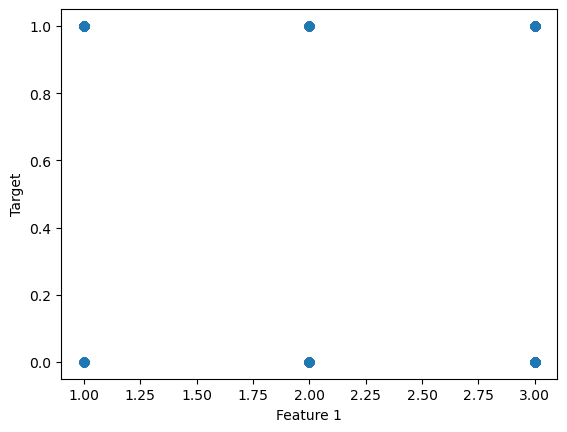

In [80]:
# polynomial features are used in non-linear relationships
# lets use matplotlib to find out if we are dealing with non-linear relationships
plt.scatter(train_csv['Pclass'], train_csv_labels)
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.show()
#the label is binary so this is difficult

In [81]:
# Try and find importances of the polynomial features
# Any useful features can help improve predictive power

polynomial_rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
polynomial_rf_model.fit(poly_features, train_csv_labels)
importances = polynomial_rf_model.feature_importances_

In [82]:
importances

array([0.03602495, 0.02653672, 0.01878165, 0.01395037, 0.04644003,
       0.05001749, 0.01498225, 0.03962452, 0.04010543, 0.05365918,
       0.07088023, 0.02331849, 0.03285157, 0.02805442, 0.04214274,
       0.0184359 , 0.01927833, 0.02494245, 0.03233267, 0.04240763,
       0.12019555, 0.01560228, 0.03419916, 0.00874192, 0.09630002,
       0.        , 0.05019405])

In [83]:
poly_feature_names = poly.get_feature_names_out(input_features=feature_names)

In [84]:
feature_importance_df = pd.DataFrame({
    'Feature': poly_feature_names,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 6: Display the most important features
print(feature_importance_df)

                    Feature  Importance
20     fare_binned Sex_male    0.120196
24             Sex_female^2    0.096300
10        Pclass Sex_female    0.070880
9        Pclass family_size    0.053659
26               Sex_male^2    0.050194
5                  Sex_male    0.050017
4                Sex_female    0.046440
19   fare_binned Sex_female    0.042408
14   age_binned family_size    0.042143
8        Pclass fare_binned    0.040105
7         Pclass age_binned    0.039625
0                    Pclass    0.036025
22   family_size Sex_female    0.034199
12             age_binned^2    0.032852
18  fare_binned family_size    0.032333
13   age_binned fare_binned    0.028054
1                age_binned    0.026537
17            fare_binned^2    0.024942
11          Pclass Sex_male    0.023318
16      age_binned Sex_male    0.019278
2               fare_binned    0.018782
15    age_binned Sex_female    0.018436
21            family_size^2    0.015602
6                  Pclass^2    0.014982


In [85]:
# the list of polynomial features shows some combinations that might be promising
# need to move data from polynomial_features to train_csv

top_feature = feature_importance_df.iloc[0]['Feature']
print(f"Top feature: {top_feature}")

Top feature: fare_binned Sex_male


In [86]:
poly_features_dense = poly_features.toarray()

# Create DataFrame with the correct column names
poly_features_df = pd.DataFrame(poly_features_dense, columns=poly_feature_names)
# Extract the column corresponding to the most important feature
selected_feature_column = poly_features_df[top_feature]
selected_feature_column # shape = (891,) this is the polynomial feature by itself

0      2.0
1      0.0
2      0.0
3      0.0
4      2.0
      ... 
886    2.0
887    0.0
888    0.0
889    2.0
890    2.0
Name: fare_binned Sex_male, Length: 891, dtype: float64

In [87]:
train_csv_with_polynomial_features = train_csv.copy()
train_csv_with_polynomial_features[top_feature] = selected_feature_column
train_csv_with_polynomial_features

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Fare_Binned,fare_binned Sex_male
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,Low,2.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Very High,0.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,Medium,0.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Very High,0.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,Medium,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Adult,Medium,2.0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Teenager,High,0.0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,High,0.0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Adult,High,2.0


In [88]:
train_csv_cat_attrib = ["Sex"]
train_csv_num_attrib = ["fare_binned Sex_male", "Pclass", "SibSp", "Parch"]
train_csv_bin_attrib = ["Age", "Fare"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(train_csv_num_attrib)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])
bin_pipeline = Pipeline([
    ('selector', DataFrameSelector(train_csv_bin_attrib)),
    ('imputer', SimpleImputer(strategy="median")),
    ('bin', BinAttributes()),
    #need to add scaler here?
])
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(train_csv_cat_attrib)),
    ('one_hot_encoder', OneHotEncoder()),
])
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline), #creates pClass and familySize
    ("bin_pipeline", bin_pipeline), #creates binned_fare and binned_age
    ("cat_pipeline", cat_pipeline), #creates male and female
])

polynomial_train_csv_prepared = full_pipeline.fit_transform(train_csv_with_polynomial_features)
polynomial_train_csv_prepared.shape

(891, 7)

In [89]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(polynomial_train_csv_prepared, train_csv_labels)

RandomForestClassifier(random_state=42)

In [90]:
num_feature_names = train_csv_num_attrib
feature_names = list(num_feature_names) + list(["age_binned", "fare_binned"]) + list(cat_feature_names)
feature_names.append("family_size")
feature_names.remove("SibSp")
feature_names.remove("Parch")
feature_names.remove("Sex_female")
feature_names.remove("Sex_male")
feature_names.append("Sex_female")
feature_names.append("Sex_male")

train_csv_prepared_dense = polynomial_train_csv_prepared.toarray()

result = permutation_importance(rf_classifier, train_csv_prepared_dense, train_csv_labels, n_repeats=10, random_state=42, n_jobs=-1)

# Extract feature importance and create a DataFrame
importance = result.importances_mean
feature_importance = pd.DataFrame(importance, index=feature_names, columns=["Importance"]).sort_values(by="Importance", ascending=False)
feature_importance

,Importance
age_binned,0.108642
family_size,0.108418
fare_binned Sex_male,0.086644
Pclass,0.051403
fare_binned,0.030752
Sex_female,0.007183
Sex_male,0.005499


In [91]:
cross_val_scores = cross_val_score(final_model, train_csv_prepared, train_csv_labels, cv=20)
average_accuracy = np.mean(cross_val_scores)
average_accuracy #accuracy got worse with polynomial features

0.8508333333333334

In [92]:
#df = pd.DataFrame(polynomial_train_csv_prepared, columns=feature_names)
#df
#polynomial_train_csv_prepared.shape # the pipeline doesn't even add the data to the data set, so how did performance dip
feature_names

['fare_binned Sex_male',
 'Pclass',
 'age_binned',
 'fare_binned',
 'family_size',
 'Sex_female',
 'Sex_male']

In [95]:
# the performance is somehow worse with the polynomial feature
# check to see if everything has been scaled correctly
print(polynomial_train_csv_prepared.shape)
print(len(feature_names))  # Should be 7

(891, 7)
7


In [96]:
polynomial_train_csv_prepared = polynomial_train_csv_prepared.toarray()
df = pd.DataFrame(polynomial_train_csv_prepared, columns=feature_names)
df
# the binned values haven't been scaled properly

,fare_binned Sex_male,Pclass,age_binned,fare_binned,family_size,Sex_female,Sex_male
0,0.603098,-0.473674,0.812858,2.0,0.0,0.0,1.0
1,-1.124749,-0.473674,-0.578605,2.0,3.0,1.0,0.0
2,-1.124749,-0.473674,0.117127,2.0,1.0,1.0,0.0
3,-1.124749,-0.473674,-0.578605,2.0,3.0,1.0,0.0
4,0.603098,-0.473674,0.117127,2.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
886,0.603098,-0.473674,-0.578605,2.0,1.0,0.0,1.0
887,-1.124749,-0.473674,-1.274337,1.0,2.0,1.0,0.0
888,-1.124749,2.008933,0.812858,2.0,2.0,1.0,0.0
889,0.603098,-0.473674,-1.274337,2.0,2.0,0.0,1.0


In [100]:
#in the bin_pipeline, add scaler
train_csv_cat_attrib = ["Sex"]
train_csv_num_attrib = ["fare_binned Sex_male", "Pclass", "SibSp", "Parch"]
train_csv_bin_attrib = ["Age", "Fare"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(train_csv_num_attrib)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])
bin_pipeline = Pipeline([
    ('selector', DataFrameSelector(train_csv_bin_attrib)),
    ('imputer', SimpleImputer(strategy="median")),
    ('bin', BinAttributes()),
    ('std_scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(train_csv_cat_attrib)),
    ('one_hot_encoder', OneHotEncoder()),
])
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline), #creates pClass and familySize
    ("bin_pipeline", bin_pipeline), #creates binned_fare and binned_age
    ("cat_pipeline", cat_pipeline), #creates male and female
])
polynomial_train_csv_prepared = full_pipeline.fit_transform(train_csv_with_polynomial_features)

In [101]:
polynomial_train_csv_prepared_array = polynomial_train_csv_prepared.toarray()
df = pd.DataFrame(polynomial_train_csv_prepared_array, columns=feature_names)
df # the labels are off, but now everything is scaled

,fare_binned Sex_male,Pclass,age_binned,fare_binned,family_size,Sex_female,Sex_male
0,0.603098,-0.473674,0.812858,0.058474,-1.346189,0.0,1.0
1,-1.124749,-0.473674,-0.578605,0.058474,1.331165,1.0,0.0
2,-1.124749,-0.473674,0.117127,0.058474,-0.453738,1.0,0.0
3,-1.124749,-0.473674,-0.578605,0.058474,1.331165,1.0,0.0
4,0.603098,-0.473674,0.117127,0.058474,-0.453738,0.0,1.0
...,...,...,...,...,...,...,...
886,0.603098,-0.473674,-0.578605,0.058474,-0.453738,0.0,1.0
887,-1.124749,-0.473674,-1.274337,-1.153160,0.438713,1.0,0.0
888,-1.124749,2.008933,0.812858,0.058474,0.438713,1.0,0.0
889,0.603098,-0.473674,-1.274337,0.058474,0.438713,0.0,1.0


In [102]:
cross_val_scores = cross_val_score(final_model, polynomial_train_csv_prepared, train_csv_labels, cv=20)
average_accuracy = np.mean(cross_val_scores)
average_accuracy #even with scaling, still worse

0.8362626262626263

In [103]:
#get rid of the polynomial feature and just leave the scaling

train_csv_cat_attrib = ["Sex"]
train_csv_num_attrib = ["Pclass", "SibSp", "Parch"]
train_csv_bin_attrib = ["Age", "Fare"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(train_csv_num_attrib)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])
bin_pipeline = Pipeline([
    ('selector', DataFrameSelector(train_csv_bin_attrib)),
    ('imputer', SimpleImputer(strategy="median")),
    ('bin', BinAttributes()),
    ('std_scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(train_csv_cat_attrib)),
    ('one_hot_encoder', OneHotEncoder()),
])
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline), #creates pClass and familySize
    ("bin_pipeline", bin_pipeline), #creates binned_fare and binned_age
    ("cat_pipeline", cat_pipeline), #creates male and female
])
train_csv_prepared = full_pipeline.fit_transform(train_csv_with_polynomial_features)

In [105]:
num_feature_names = train_csv_num_attrib
feature_names = list(num_feature_names) + list(["age_binned", "fare_binned"]) + list(cat_feature_names)
feature_names.append("family_size")
feature_names.remove("SibSp")
feature_names.remove("Parch")
feature_names.remove("Sex_female")
feature_names.remove("Sex_male")
feature_names.append("Sex_female")
feature_names.append("Sex_male")

train_csv_prepared_array = train_csv_prepared.toarray()
df = pd.DataFrame(train_csv_prepared_array, columns=feature_names)
df 

,Pclass,age_binned,fare_binned,family_size,Sex_female,Sex_male
0,0.827377,0.059160,0.058474,-1.346189,0.0,1.0
1,-1.566107,0.059160,0.058474,1.331165,1.0,0.0
2,0.827377,-0.560975,0.058474,-0.453738,1.0,0.0
3,-1.566107,0.059160,0.058474,1.331165,1.0,0.0
4,0.827377,-0.560975,0.058474,-0.453738,0.0,1.0
...,...,...,...,...,...,...
886,-0.369365,-0.560975,0.058474,-0.453738,0.0,1.0
887,-1.566107,-0.560975,-1.153160,0.438713,1.0,0.0
888,0.827377,1.299429,0.058474,0.438713,1.0,0.0
889,-1.566107,-0.560975,0.058474,0.438713,0.0,1.0


In [107]:
cross_val_scores = cross_val_score(final_model, train_csv_prepared, train_csv_labels, cv=20)
average_accuracy = np.mean(cross_val_scores)
average_accuracy #with scaling but no polynomial, still at 85%

0.8508333333333334